## This notebook is for NLP on Yelp reviews

In [1]:
#let us start with importig libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

** let us import the data**

In [5]:
dataset = pd.read_csv('yelp.csv')

In [6]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# let us get some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [8]:
dataset.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
# let us create a new column which specifies the length of review
dataset['length'] = dataset['text'].apply(len)

In [10]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## EDA

Its time to explore the data

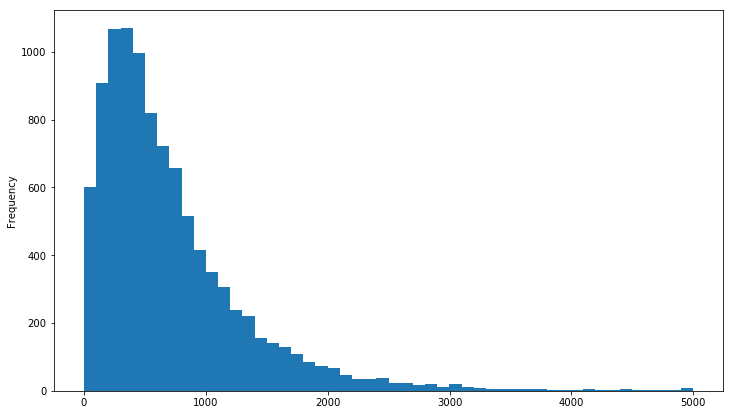

In [14]:
dataset['length'].plot(kind='hist', bins=50, figsize=(12,7))

#### We can see the maximum reviews have 1000 characters

In [24]:
# let us see the 'type' column. This means all the data is review 
dataset['type'].nunique()

1

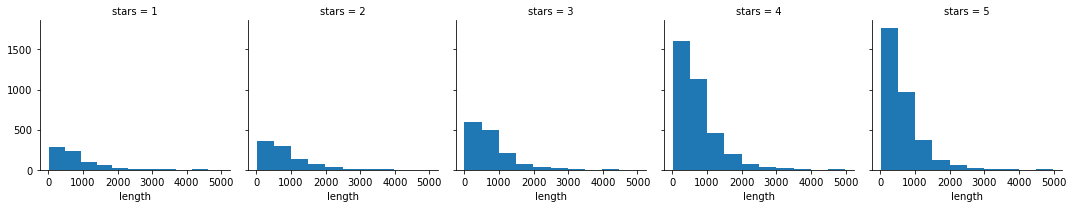

In [31]:
g = sns.FacetGrid(dataset,col='stars')
g.map(plt.hist,'length')

In [32]:
# We can see that the increase in number of stars increase the lenght of review 

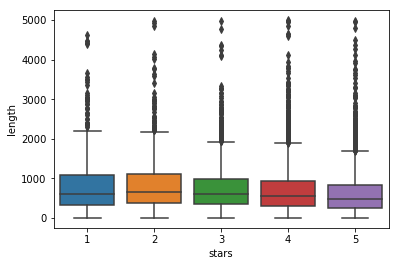

In [34]:
# Let us make a box plot for this
sns.boxplot(x='stars', y='length',data=dataset)

In [35]:
# Let us see how many times do each type of review occur

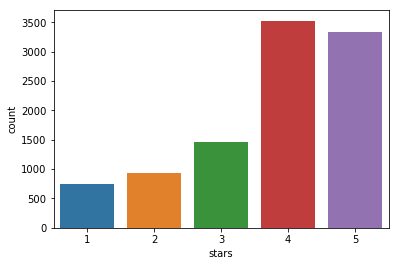

In [37]:
sns.countplot(x='stars',data=dataset)

In [38]:
## This shows we have maximum of 4 star reviews, but the 5 stars ar ejust close by them

In [43]:
stars = dataset.groupby('stars').mean()
stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [44]:
stars.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


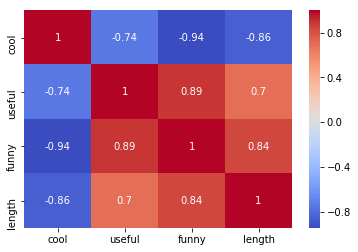

In [46]:
sns.heatmap(stars.corr(), cmap='coolwarm',annot=True)

## Now we are on own NLP task

Here we are creating only the data where either we have 5 stars i.e. we have maximum positive rating or we have 1 star i.e. we have maximum negative rating 

In [58]:
temp_dataset = dataset[(dataset.stars==1) | (dataset.stars==5)]

In [60]:
temp_dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [62]:
X = temp_dataset['text']

In [63]:
y = temp_dataset['stars']

** Importing CounVectorizer**

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

In [65]:
X = counter.fit_transform(X)

**Let us split the dataset **

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

** Let us create a model and do some predictions. I know it is too early, we haven't applied TF-IDF but lets do it**

## Training the model and predictinng

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
classifier = MultinomialNB()

In [75]:
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

** Time to get some predictions**

In [76]:
pred = classifier.predict(X_test)

## Evaluating our bare model

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



***Wow! We just got an accuracy to an F1 score 0.92, but see the F1 score of 1 is small, so its classifying the 5 stars easily but having problem in 1 stras***

** Let us now add TF-IDF into this system**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline = Pipeline([('count', CountVectorizer()), # strings to token integer counts
                    ('tfidf', TfidfTransformer()),# integer counts to weighted TF-IDF scores
                    ('classifier', MultinomialNB())])  # train on TF-IDF vectors w/ Naive Bayes classifier

## Its time to work with the pipeline system

#### We need new X since we did changed it in CountVectorizer

In [83]:
X = temp_dataset['text']
y = temp_dataset['stars']

** We need to do the tain test split again**

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

** Using the pipeline **

In [85]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

**Predicting Using pipeline**

In [86]:
pred = pipeline.predict(X_test)

## Evaluating our model

In [89]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** Oh it seems that TF-IDF made the things worse. So we need to create another system where we don't implement this**

In [90]:
X = temp_dataset['text']
y = temp_dataset['stars']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [92]:
pipeline = Pipeline([('count', CountVectorizer()), # strings to token integer counts
                    ('classifier', MultinomialNB())])  # train on TF-IDF vectors w/ Naive Bayes classifier

In [93]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [95]:
pred = pipeline.predict(X_test)

In [96]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[155  73]
 [ 15 983]]
             precision    recall  f1-score   support

          1       0.91      0.68      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.93      0.93      0.92      1226



** Oh ok, now we have F1 score of 0.92. Let us check it out**

### Random Test

In [113]:
test_pred = pipeline.predict(['I will not come here again.'])

In [114]:
print(test_pred)

[5]


In [115]:
test_pred = pipeline.predict(['This place is very bad'])

In [116]:
print(test_pred)

[5]


In [117]:
test_pred = pipeline.predict(['Worst place ever'])
print(test_pred)

[1]


The test is not satisfying at all. As we can see that it requires very bad words to differentiate between 1 and 5. The reason
a) Imabalanced data, as we have 700 data points for 1 star rating, but we have 3500 for 5 star rating.

Solution.
We need better dataset for better classification.